# Code for Plot 
## First query rep_arousal single file

In [172]:
import mysql.connector as mariadb 
import matplotlib as mpl
import numpy as np  
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
# personal module to save connection details to server
import myConnection as mc

In [173]:
# fig = plt.figure() # creating a plot
# ax = fig.add_subplot(111)

user,password,host,database = mc.getConnectionDetails() # save connection details

mariadb_connection = mariadb.connect(user=user, password=password, host=host, database=database) # connect to server
cursor  = mariadb_connection.cursor() # this will execute queries on server
# cursor2 = mariadb_connection.cursor()


# query to get the data
query = f"SELECT  a.timestamp, a.resp, ar.value FROM `Thesis_resp`  a , `Thesis_arousal` ar WHERE a.file_id = ar.file_id AND a.timestamp = ar.timestamp AND ar.file_id=4 group by a.timestamp;"

# executing the data
cursor.execute(query)


In [174]:

# the data that i want to save, saved in lists
dataBPM = []
dataresp = []
dataArousal = []

dataX1_correlation = [] ## to use later for correlation?
dataX2_correlation = []

xTickMarks = []


In [175]:
# get the results of the query and save them
rows = cursor.fetchall()
#for row in rows :
#    print(row)

for row in rows:
    dataresp.append(row[1])
    dataArousal.append(row[2])
    xTickMarks.append(row[0])

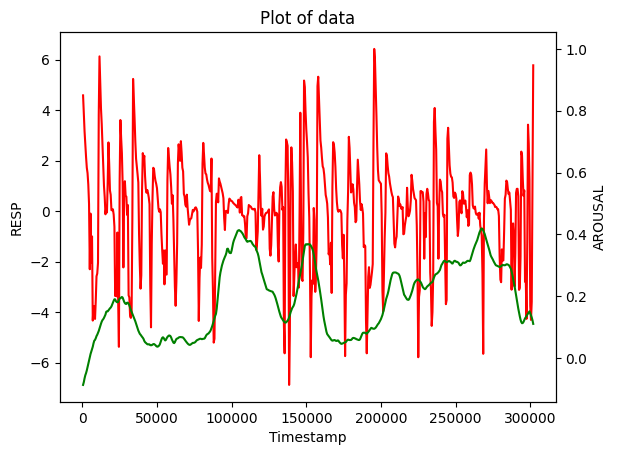

In [176]:
## necessary variables, the X axis is really spread so I squeeze them
ind = np.arange(len(xTickMarks))                # the x locations for the groups
width = 1                     # the width of the scatter plot, preferrable to use

## the bars
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(xTickMarks,dataresp,width,color='r', label='resp')
ax2.plot(xTickMarks,dataArousal,width,color='g', label='arousal')


ax1.set_ylabel('RESP')
ax2.set_ylabel('AROUSAL')
ax1.set_xlabel('Timestamp')
ax1.set_title('Plot of data')

#print(max(dataresp))
plt.show()
# plt.savefig('resultQueryBPM_V1.jpg')



# Test second query resp_arousal with AVG

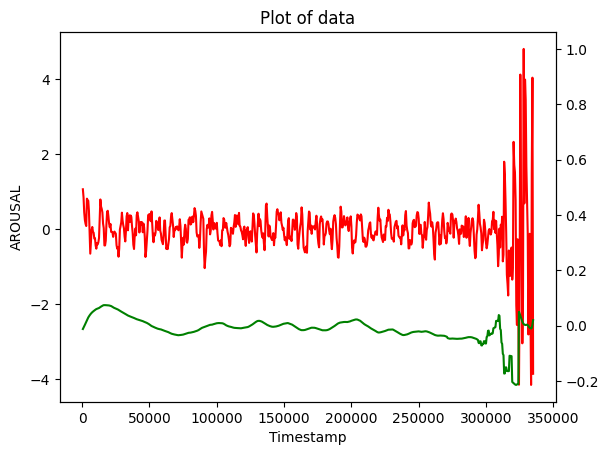

In [177]:
query = f"SELECT  a.timestamp, AVG(a.resp), AVG(ar.value) FROM `Thesis_resp`  a , `Thesis_arousal` ar WHERE a.file_id = ar.file_id AND a.timestamp = ar.timestamp group by a.timestamp;"

cursor.execute(query)

dataBPM = []
dataresp = []
dataArousal = []
xTickMarks = []

rows = cursor.fetchall()

for row in rows:
    dataresp.append(row[1])
    dataArousal.append(row[2])
    xTickMarks.append(row[0])
    


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(xTickMarks,dataresp,width,color='r', label='resp')
ax2.plot(xTickMarks,dataArousal,width,color='g', label='arousal')


ax1.set_ylabel('RESP')
ax1.set_ylabel('AROUSAL')
ax1.set_xlabel('Timestamp')
ax1.set_title('Plot of data')


plt.show()




## Third query BPM_arousal single file

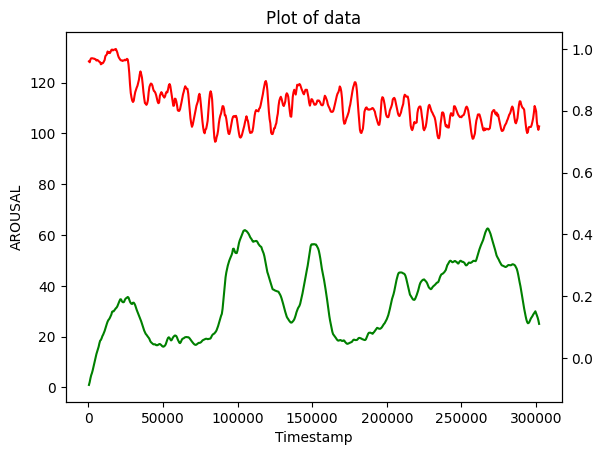

In [178]:
query=f"SELECT  a.timestamp, a.BPM, ar.value FROM `Thesis_BPM`  a , `Thesis_arousal` ar WHERE a.file_id = ar.file_id AND a.timestamp = ar.timestamp AND ar.file_id=4 group by a.timestamp;"
cursor.execute(query)

dataBPM = []
dataresp = []
dataArousal = []
xTickMarks = []

rows = cursor.fetchall()

for row in rows:
    dataBPM.append(row[1])
    dataArousal.append(row[2])
    xTickMarks.append(row[0])
    


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(xTickMarks,dataBPM,width,color='r', label='BPM')
ax2.plot(xTickMarks,dataArousal,width,color='g', label='arousal')


ax1.set_ylabel('BPM')
ax1.set_ylabel('AROUSAL')
ax1.set_xlabel('Timestamp')
ax1.set_title('Plot of data')


plt.show()




## Fourth query BPM_arousal with AVG

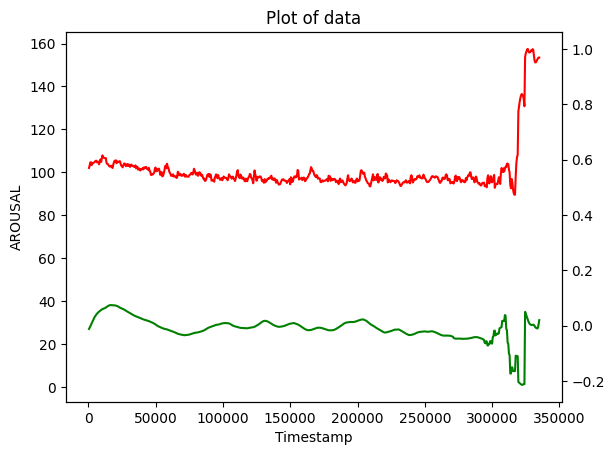

In [179]:
query=f"SELECT  a.timestamp, AVG(a.BPM), AVG(ar.value) FROM `Thesis_BPM`  a , `Thesis_arousal` ar WHERE a.file_id = ar.file_id AND a.timestamp = ar.timestamp group by a.timestamp;"
cursor.execute(query)

dataBPM = []
dataresp = []
dataArousal = []
xTickMarks = []

rows = cursor.fetchall()

for row in rows:
    dataBPM.append(row[1])
    dataArousal.append(row[2])
    xTickMarks.append(row[0])
    


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(xTickMarks,dataBPM,width,color='r', label='BPM')
ax2.plot(xTickMarks,dataArousal,width,color='g', label='arousal')


ax1.set_ylabel('BPM')
ax1.set_ylabel('AROUSAL')
ax1.set_xlabel('Timestamp')
ax1.set_title('Plot of data')


plt.show()


# Correlation from this point
### Maybe on average data, correlation cannot be computed

In [180]:
# trying to find correlation from this point
# maybe the idea to calculate on average is dumb

query2 = f"SELECT  a.timestamp, a.resp, ar.value FROM `Thesis_resp`  a , `Thesis_arousal` ar WHERE a.file_id = ar.file_id AND a.timestamp = ar.timestamp AND ar.file_id=4 group by a.timestamp;"

# Correlation finder
cursor.execute(query2)
rows_unnormalized = cursor.fetchall()

for row in rows_unnormalized:
    dataX1_correlation.append(row[1])
    dataX2_correlation.append(row[2])

mariadb_connection.close()


# correlation on data that was averaged maybe was a very dumb idea

npX1  = np.array(dataX1_correlation)
npX2 = np.array(dataX2_correlation)
print(np.corrcoef(npX1,npX2))

[[ 1.        -0.0109354]
 [-0.0109354  1.       ]]
